In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

In [133]:
car = pd.read_csv('car.csv',names = ['buying','maint','doors',
                                                                                               'persons','lug_boot','safety','class'])



In [134]:
car.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [135]:
classes = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

car = car.replace({'class': classes})
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [136]:
buy = {
    'vhigh': 0,
    'high': 1,
    'med': 2,
    'low': 3
}
maintenance = {
    'vhigh': 0,
    'high': 1,
    'med': 2,
    'low': 3
}
door = {
    '2': 0,
    '3': 1,
    '4': 2,
    '5more': 3
}
person = {
    '2': 0,
    '3': 1,
    'more': 2
}
boot = {
    'small': 0,
    'med': 1,
    'big': 2
}
safety = {
    'low': 0,
    'med': 1,
    'high': 2
}

car = car.replace({'buying': buy,'maint': maintenance,'doors': door,'persons': person,'lug_boot': boot,'safety': safety},)
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


# Decision Tree


In [137]:
X = car.iloc[:, :6]
Y = car.iloc[:, 6]
X = np.array(X)
Y = np.array(Y)

In [138]:
X

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       ...,
       [3, 3, 3, 2, 2, 0],
       [3, 3, 3, 2, 2, 1],
       [3, 3, 3, 2, 2, 2]], dtype=object)

In [139]:
#tree = DecisionTreeClassifier(criterion='entropy')
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

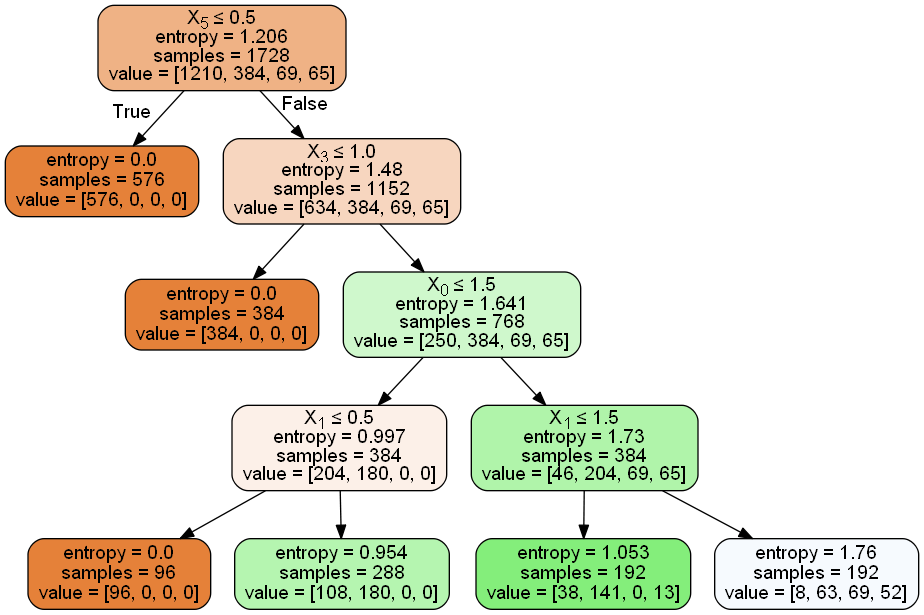

In [140]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [141]:
predict = tree.predict(X)
predict

array([0, 0, 0, ..., 0, 2, 2], dtype=int64)

In [142]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(Y, predict))

Accucary: 0.8368055555555556


# KNN Classification

### Splitting Data into training and testing

In [143]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(car.iloc[:,:6],car['class'] , test_size=0.3)

### Generating Model for with Varying K values

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Clusters = []
Accuracy = []

for i in range(1,20):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)
    #Train the model using the training dataset
    knn.fit(X_train, y_train)
    #Predict the output for test dataset
    y_pred = knn.predict(X_test)
    Clusters.append(i)
    #df['pred']=y_pred
    Accuracy.append(metrics.accuracy_score(y_test, y_pred))

print(Clusters)
print(Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.8516377649325626, 0.8516377649325626, 0.9171483622350675, 0.9036608863198459, 0.9460500963391136, 0.9325626204238922, 0.9479768786127167, 0.9171483622350675, 0.9267822736030829, 0.9132947976878613, 0.9210019267822736, 0.9075144508670521, 0.9094412331406551, 0.9210019267822736, 0.9152215799614644, 0.9152215799614644, 0.9152215799614644, 0.9036608863198459, 0.9113680154142582]


### Analysis

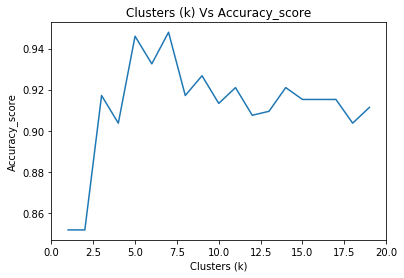

In [153]:
import matplotlib.pyplot as plt
plt.title("Clusters (k) Vs Accuracy_score")
plt.xlabel("Clusters (k)")
plt.xlim(0,20,1)
plt.ylabel("Accuracy_score")
plt.plot(Clusters, Accuracy)
plt.show()